In [72]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import make_blobs

In [73]:
# mean_01 = np.array([0.0,0.0])
# mean_02 = np.array([7.0,0.0])
# mean_03 = np.array([0.0,7.0])

# cov_01 = np.array([[2.0, 1.0],
#                    [1.0, 3.0]])
# cov_02 = np.array([[4.0, 0.0],
#                    [0.0, 2.0]])
# cov_03 = np.array([[2.0, 1.0],
#                    [1.0, 3.0]])

In [74]:
# create the different datasets

# data_01 = np.random.multivariate_normal(mean_01,cov_01,250)
# data_02 = np.random.multivariate_normal(mean_02,cov_02,250)
# data_03 = np.random.multivariate_normal(mean_03,cov_03,250)

# np.random.random(2,)
# print(data_01.shape)
# print(data_01) # 2d array consisting of 250 1d array of datapoints(x-y coordinates)

In [75]:
# Plot the different datasets to visualize
#data_01[:,0] # locate all x

# plt.figure(0)
# plt.scatter(data_01[:,0],data_01[:,1],color='green')
# plt.scatter(data_02[:,0],data_02[:,1],color='red')
# plt.scatter(data_03[:,0],data_03[:,1],color='yellow')
# plt.show()

In [76]:
# Number of clusters
# k = 3

# Generate random clusters
# clusters = {}

# colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']
# dim = data_01.shape[1] # 2(x,y) dimension
# for kx in range(k):
#     cluster_id = kx
#     points = []
#     center = 10.0 * (np.random.random(dim,)*2 - 1) # np.random.random(dim,) array with 2 elements having elements ranging from 0 and 1
#     color = colors[kx]
#     clusters[cluster_id] = {
#         'points': points,
#         'center': center,
#         'color': color
#     }
# print(clusters)

In [77]:
data_X, data_y = make_blobs(1000, 2, 5)
print (data_X.shape, data_y.shape)
print(data_X[0])

(1000, 2) (1000,)
[10.17900771 -5.6626749 ]


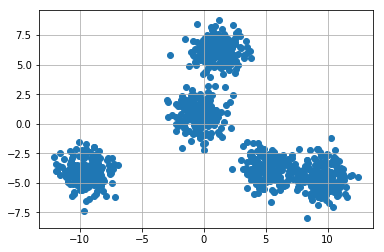

In [78]:
plt.figure(0)
plt.grid(True)
plt.scatter(data_X[:, 0], data_X[:, 1])
plt.show()

In [79]:
k = 5

# Generate random cluster centers
clusters = {}

colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'pink']

for kx in range(k):
    cluster_id = kx
    points = []
    dim = data_X.shape[1]
    center = 10.0*(np.random.random((dim,))*2 - 1)
    color = colors[kx]
    clusters[cluster_id] = {
        'points': points,
        'center': center,
        'color': color
    }

print (clusters)

{0: {'points': [], 'center': array([-6.65295028,  8.63536516]), 'color': 'red'}, 1: {'points': [], 'center': array([8.57808907, 3.89872183]), 'color': 'green'}, 2: {'points': [], 'center': array([-6.49377433,  1.48676661]), 'color': 'blue'}, 3: {'points': [], 'center': array([ 2.77252672, -0.04403441]), 'color': 'yellow'}, 4: {'points': [], 'center': array([ 4.65110616, -1.26390577]), 'color': 'cyan'}}


In [80]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

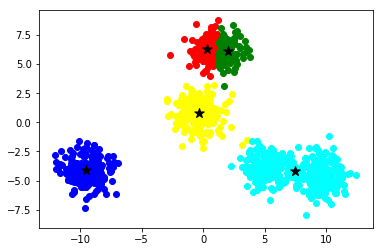

In [86]:
# Allocate points to cluster
# for every loop it calculates distance of every point with every k
# shifts the center
# prints the graph
for ix in range(data_X.shape[0]): # 1000
    # For each point, get distance with each cluster
    dist = [] # it is initializing every time
    for kx in range(k):
        d = distance(data_X[ix], clusters[kx]['center'])
        dist.append(d)
    # Get cluster id where current point belongs
    c_id = np.argmin(dist) # it return one of 0,1,2,3,4
#     print(c_id)
    
    clusters[c_id]['points'].append(data_X[ix])

for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    if pts.shape[0] > 0: # cluster alloted at least one point
        # Compute new cluster center
        new_center = pts.mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['points'] = pts
    clusters[kx]['center'] = new_center

plt.figure(0)

for kx in range(k):
    cc = clusters[kx]['center']
    
    pts = clusters[kx]['points']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
    
    clusters[kx]['points'] = []
plt.show()